In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# READING OUR DATA

In [2]:
METADATA_PATH = '/kaggle/input/brian-tumor-dataset/metadata.csv'
TUMOR_IMG_PATH = '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/'
HEALTHY_IMG_PATH = '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/'
DF_DIR_PATH = '/kaggle/working/brian-tumor-dataset/'
DF_PATH = DF_DIR_PATH + 'preprocessed-dataset.csv'

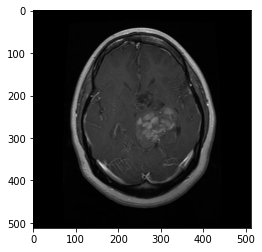

In [3]:
#display random Brain Tumor image
img = mpimg.imread('../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg')
plt.imshow(img)

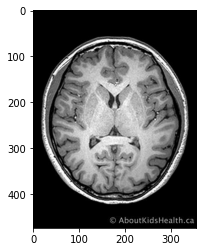

In [4]:
#display random Brain Healthy image
img2 = mpimg.imread('../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1003).jpg')
plt.imshow(img2)

- When you look at the whole dataset you will discover :
     - Some images saved as RGB, we can use them in grayscale instead of RGB
     - Some noise in background

In [5]:
def rgb2gray(rgb_img):
    if rgb_img.ndim == 3:
        R, G, B = rgb_img[:, :, 0], rgb_img[:, :, 1], rgb_img[:, :, 2]
        output_img = 0.2989 * R + 0.5870 * G + 0.1140 * B
    else:
       output_img = rgb_img
    if output_img.max() < 1.1:
        output_img = output_img * 255
    return output_img

# Trying preprocessing Steps on single image

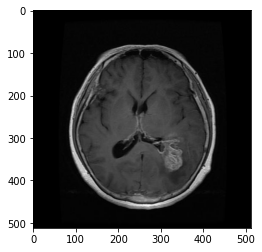

In [6]:
img = mpimg.imread('../input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg')
plt.imshow(img)

# Thresholding

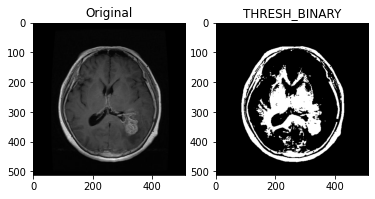

In [7]:
ret,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
plt.imshow(th1)

plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,2, 2)
plt.title("THRESH_BINARY")
plt.imshow(th1)

In [8]:
hist_values = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])

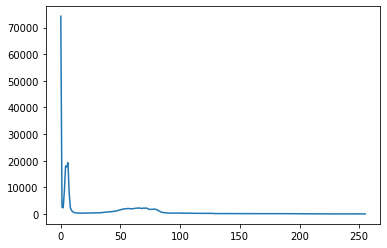

In [9]:
plt.plot(hist_values)

# Edge Detection 

In [10]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

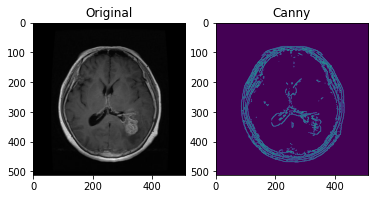

In [11]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,2, 2)
plt.title("Canny")
plt.imshow(edges)

In [12]:
blurred_img = cv2.blur(img,ksize=(5,5))

In [13]:
med_val = np.median(img) 
upper = int(min(255,1.3 * med_val))
lower = int(max(0, 0.7* med_val))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

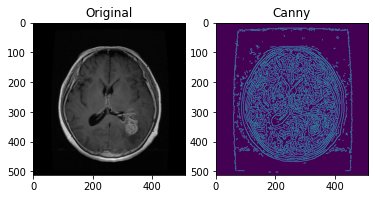

In [14]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,2, 2)
plt.title("Canny")
plt.imshow(edges)

this image will not help in our prediction

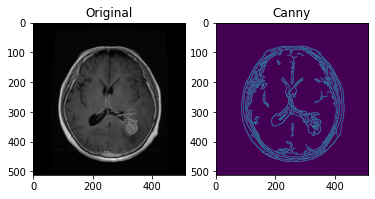

In [15]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)


edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)


plt.subplot(1,2, 2)
plt.title("Canny")
plt.imshow(edges)

it's more better

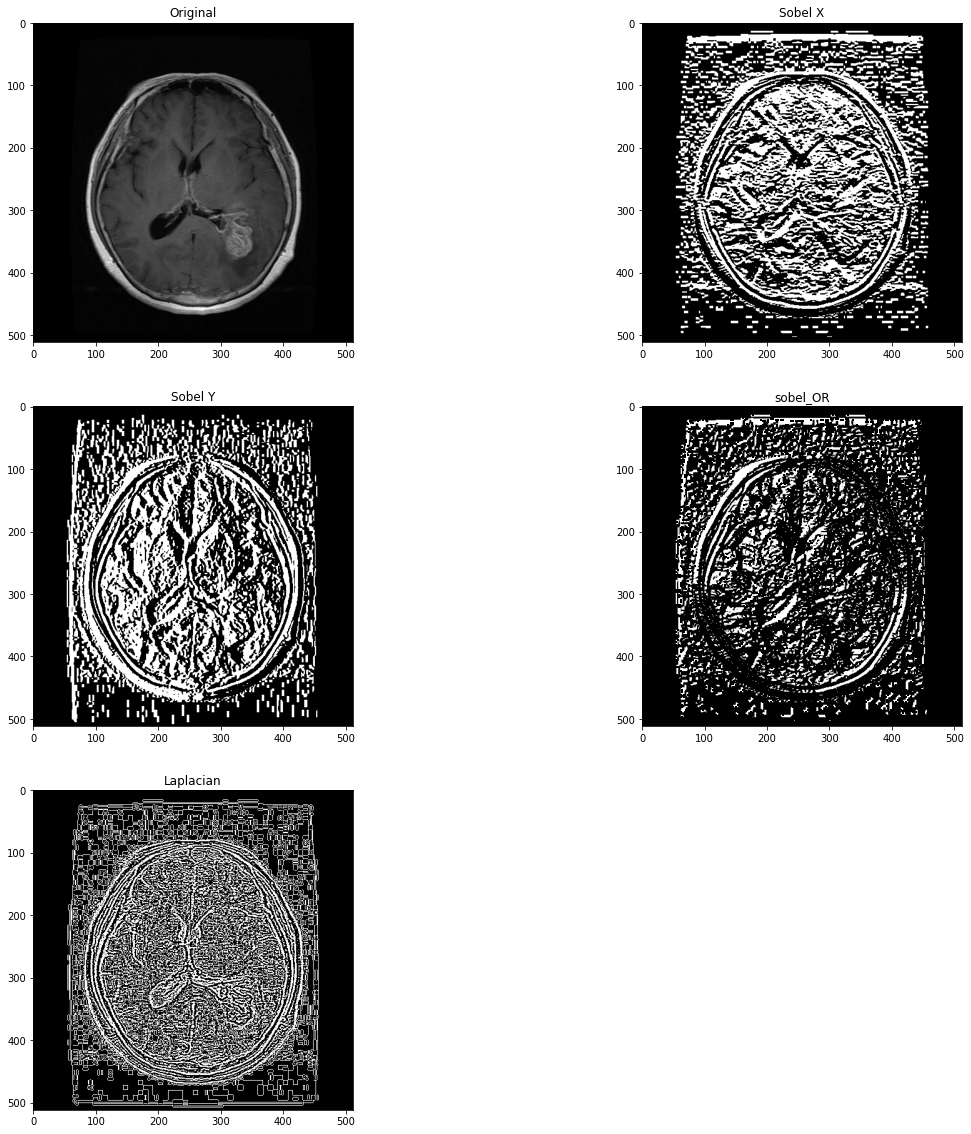

In [16]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

we can not learn alot from them

# Dilation

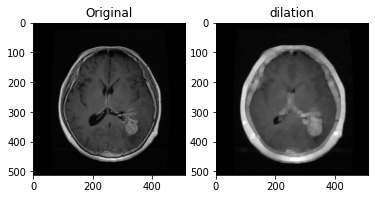

In [17]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)
kernel = np.ones((10,10), np.uint8)

dilation = cv2.dilate(img, kernel, iterations = 1)
plt.subplot(1,2, 2)
plt.title("dilation")
plt.imshow(dilation)

we just trying !

# Binarization

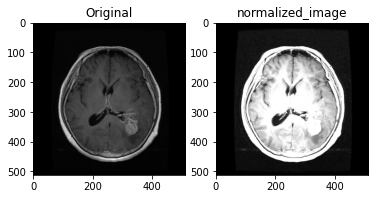

In [18]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)

normalized_image = cv2.normalize(img, None, 0, 900, cv2.NORM_MINMAX)
plt.subplot(1,2, 2)
plt.title("normalized_image")
plt.imshow(normalized_image)

# ORB

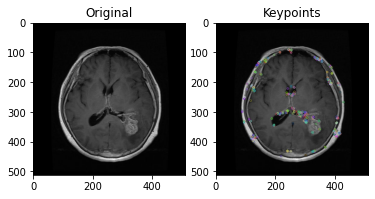

In [19]:
plt.subplot(1,2, 1)
plt.title("Original")
plt.imshow(img)

img_1=img
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img_1,None)
# compute the descriptors with ORB
kp, des = orb.compute(img_1, kp)
# draw keypoints
cv2.drawKeypoints(img_1,kp,img_1)

plt.subplot(1,2, 2)
plt.title("Keypoints")
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

